In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import os
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout,LSTM

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import date, timedelta
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

data_path = 'D:/universidad/universidad 4/TFG/recursos para el desarrollo/datos procesados/OD'

In [2]:
delta = e_date - i_date

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

In [3]:
def read_OD_fn(source_type):
    ods = {}
    for date in tqdm_notebook(target_days):
        od_date= pd.read_csv(os.path.join(data_path, 'date_{}_OD_{}.csv'.format(source_type,date.strftime('%Y-%m-%d'))), 
                            index_col=0)
        ods[date] = od_date
    return ods

In [4]:
ine_ods = read_OD_fn('INE')

  0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
twt_ods = read_OD_fn('TWT')

  0%|          | 0/81 [00:00<?, ?it/s]

# Serializar los datos

In [6]:
lista_twt1 = []
lista_twt2 = []
lista_twt3 = []
lista_twt4 = []
lista_twt5 = []

for date in tqdm_notebook(target_days):
    lista_twt1.append(twt_ods[date].loc['58MA','total'])
    lista_twt2.append(twt_ods[date].loc['156B','total'])
    lista_twt3.append(twt_ods[date].loc['34CZ','total'])
    lista_twt4.append(twt_ods[date].loc['165V','total'])
    lista_twt5.append(twt_ods[date].loc['13VI','total'])
    
    
lista_ine1 = []
lista_ine2 = []
lista_ine3 = []
lista_ine4 = []
lista_ine5 = []

for date in tqdm_notebook(target_days):
    lista_ine1.append(ine_ods[date].loc['58MA','total'])
    lista_ine2.append(ine_ods[date].loc['156B','total'])
    lista_ine3.append(ine_ods[date].loc['34CZ','total'])
    lista_ine4.append(ine_ods[date].loc['165V','total'])
    lista_ine5.append(ine_ods[date].loc['13VI','total'])


  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
df_twt1 = pd.DataFrame (lista_twt1, columns = ['Viajes'], index= target_days)
df_ine1 = pd.DataFrame (lista_ine1, columns = ['Viajes'], index= target_days)

df_twt2 = pd.DataFrame (lista_twt2, columns = ['Viajes'], index= target_days)
df_ine2 = pd.DataFrame (lista_ine2, columns = ['Viajes'], index= target_days)

df_twt3 = pd.DataFrame (lista_twt3, columns = ['Viajes'], index= target_days)
df_ine3 = pd.DataFrame (lista_ine3, columns = ['Viajes'], index= target_days)

df_twt4 = pd.DataFrame (lista_twt4, columns = ['Viajes'], index= target_days)
df_ine4 = pd.DataFrame (lista_ine4, columns = ['Viajes'], index= target_days)

df_twt5 = pd.DataFrame (lista_twt5, columns = ['Viajes'], index= target_days)
df_ine5 = pd.DataFrame (lista_ine5, columns = ['Viajes'], index= target_days)

In [8]:
lista_twt = []
lista_ine = []

df_twt = df_twt1 + df_twt2 + df_twt3 + df_twt4 + df_twt5
df_ine = df_ine1 + df_ine2 + df_ine3 + df_ine4 + df_ine5

In [9]:
df_twt.head()

,Viajes
2020-04-01,11
2020-04-02,3
2020-04-03,14
2020-04-04,5
2020-04-05,13


In [10]:
df_ine.head()

,Viajes
2020-04-01,16278
2020-04-02,16895
2020-04-03,18153
2020-04-04,13180
2020-04-05,11805


In [11]:
del twt_ods
del ine_ods

# Visualización de datos

In [12]:
print(df_twt.index.min())
print(df_ine.index.max())

2020-04-01 00:00:00
2020-06-20 00:00:00


In [13]:
print(len(df_twt['2020']))

81


In [14]:
print(len(df_ine['2020']))

81


In [15]:
df_twt.describe()

,Viajes
count,81.000000
mean,17.518519
std,8.148790
min,0.000000
25%,11.000000
50%,16.000000
75%,24.000000
max,34.000000


In [16]:
df_ine.describe()

,Viajes
count,81.000000
mean,30777.061728
std,13658.229593
min,10416.000000
25%,18843.000000
50%,30457.000000
75%,42480.000000
max,55828.000000


In [17]:
meses = df_twt.resample('M').mean()
meses

,Viajes
2020-04-30,11.033333
2020-05-31,20.258065
2020-06-30,23.000000


In [18]:
meses = df_ine.resample('M').mean()
meses

,Viajes
2020-04-30,18261.733333
2020-05-31,32278.387097
2020-06-30,47223.000000


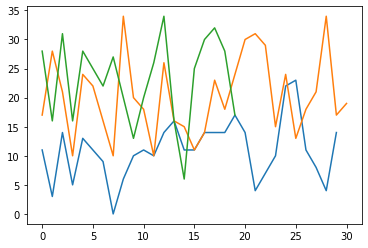

In [19]:
abril = df_twt['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_twt['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_twt['2020-06-01':'2020-06-20']
plt.plot(junio.values)

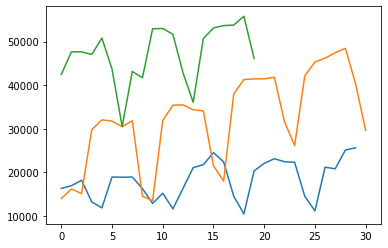

In [20]:
abril = df_ine['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_ine['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_ine['2020-06-01':'2020-06-20']
plt.plot(junio.values)

# Preprocesado de datos

In [21]:
dataset_twt = df_twt.values
dataset_twt = dataset_twt.astype('float32')

dataset_ine = df_ine.values
dataset_ine = dataset_ine.astype('float32')

In [22]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

# Dividimos los datos en sets de entrenamiento y validacion

In [23]:
#dividimos nuestros valores entre sets de entrenamiento y de test
n_train_days = 60
train_twt = dataset_twt[:n_train_days, :]
test_twt = dataset_twt[n_train_days:, :]

train_ine = dataset_ine[:n_train_days, :]
test_ine = dataset_ine[n_train_days:, :]

print(len(train_twt), len(test_twt))

60 21


In [24]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset1, dataset2, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [25]:
# dividimos en entradas y salidas
look_back = 7
trainX, trainY = create_dataset(train_twt, train_ine, look_back)
testX, testY = create_dataset(test_twt, test_ine, look_back)

print(len(trainX), len(testY))

53 14


In [26]:
print(trainX)

[[[[0.12908483 0.32352942]]

  [[0.14267153 0.0882353 ]]

  [[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]]


 [[[0.14267153 0.0882353 ]]

  [[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]]


 [[[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]]


 [[[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]

  [[0.05317977 0.29411766]]]


 [[[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]

  [[0.05317977 0.29411766]]

  [[0.

In [27]:
print(trainY)

[0.18671277 0.12793976 0.05317977 0.10444376 0.02567604 0.1293931
 0.23418918 0.24907511 0.31002817 0.26323438 0.08909538 0.
 0.21734342 0.25565928 0.27919933 0.2640932  0.2611204  0.08898529
 0.01559059 0.23639125 0.2282216  0.32315245 0.33438298 0.07749054
 0.12613407 0.10285828 0.42594466 0.47579935 0.46945742 0.44131508
 0.47130713 0.08935964 0.06632608 0.47229806 0.5499207  0.5517484
 0.52682114 0.5209416  0.24343786 0.16645381 0.6077689  0.67957807
 0.68307936 0.68316746 0.6916013  0.46597818 0.34607592 0.69827354
 0.76862943 0.78765523 0.8153131  0.83762    0.6593411 ]


In [28]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 2))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 2))

In [29]:
print(trainX)

[[[0.12908483 0.32352942]
  [0.14267153 0.0882353 ]
  [0.17037347 0.4117647 ]
  [0.06086496 0.14705883]
  [0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]]

 [[0.14267153 0.0882353 ]
  [0.17037347 0.4117647 ]
  [0.06086496 0.14705883]
  [0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]]

 [[0.17037347 0.4117647 ]
  [0.06086496 0.14705883]
  [0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]
  [0.12793976 0.1764706 ]]

 [[0.06086496 0.14705883]
  [0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]
  [0.12793976 0.1764706 ]
  [0.05317977 0.29411766]]

 [[0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]
  [0.12793976 0.1764706 ]
  [0.05317977 0.29411766]
  [0.10444376 0.32352942]]

 [[0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]
  

In [30]:
print(trainY)

[0.18671277 0.12793976 0.05317977 0.10444376 0.02567604 0.1293931
 0.23418918 0.24907511 0.31002817 0.26323438 0.08909538 0.
 0.21734342 0.25565928 0.27919933 0.2640932  0.2611204  0.08898529
 0.01559059 0.23639125 0.2282216  0.32315245 0.33438298 0.07749054
 0.12613407 0.10285828 0.42594466 0.47579935 0.46945742 0.44131508
 0.47130713 0.08935964 0.06632608 0.47229806 0.5499207  0.5517484
 0.52682114 0.5209416  0.24343786 0.16645381 0.6077689  0.67957807
 0.68307936 0.68316746 0.6916013  0.46597818 0.34607592 0.69827354
 0.76862943 0.78765523 0.8153131  0.83762    0.6593411 ]


# Creamos la red neuronal

In [31]:
def crear_modeloFF():
    model = Sequential() 
    model.add(LSTM(20, input_shape=(look_back,2), return_sequences=True))
    model.add(LSTM(50, input_shape=(look_back,2), return_sequences=True))
    model.add(Dropout(0.30))
    model.add(LSTM(100, input_shape=(look_back,2)))
    model.add(Dropout(0.30))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model

In [32]:
model = crear_modeloFF()

history=model.fit(trainX, trainY, epochs=200, validation_data=(testX,testY), batch_size=1, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 20)             1840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
____________________________________________________

Epoch 123/200
53/53 - 0s - loss: 0.0087 - val_loss: 0.0234
Epoch 124/200
53/53 - 0s - loss: 0.0104 - val_loss: 0.0405
Epoch 125/200
53/53 - 0s - loss: 0.0075 - val_loss: 0.0240
Epoch 126/200
53/53 - 0s - loss: 0.0074 - val_loss: 0.0272
Epoch 127/200
53/53 - 0s - loss: 0.0058 - val_loss: 0.0279
Epoch 128/200
53/53 - 0s - loss: 0.0069 - val_loss: 0.0328
Epoch 129/200
53/53 - 0s - loss: 0.0078 - val_loss: 0.0208
Epoch 130/200
53/53 - 0s - loss: 0.0101 - val_loss: 0.0257
Epoch 131/200
53/53 - 0s - loss: 0.0096 - val_loss: 0.0342
Epoch 132/200
53/53 - 0s - loss: 0.0077 - val_loss: 0.0306
Epoch 133/200
53/53 - 0s - loss: 0.0067 - val_loss: 0.0219
Epoch 134/200
53/53 - 0s - loss: 0.0070 - val_loss: 0.0275
Epoch 135/200
53/53 - 0s - loss: 0.0081 - val_loss: 0.0275
Epoch 136/200
53/53 - 0s - loss: 0.0119 - val_loss: 0.0281
Epoch 137/200
53/53 - 0s - loss: 0.0084 - val_loss: 0.0302
Epoch 138/200
53/53 - 0s - loss: 0.0090 - val_loss: 0.0215
Epoch 139/200
53/53 - 0s - loss: 0.0074 - val_loss: 0.03

# Visualizamos resultados

In [33]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def compute_metrics_fn(y_valid_resc, y_hat_resc):
    mae_ = mean_absolute_error(y_valid_resc, y_hat_resc)
    mse_ = mean_squared_error(y_valid_resc, y_hat_resc)
    rmse_ = mean_squared_error(y_valid_resc, y_hat_resc, squared = False)
    cvrmse_ = rmse_/np.mean(y_valid_resc)*100 # it is a percentage
    mape_ = mape(y_valid_resc, y_hat_resc)
    
    return mae_, mse_, rmse_, cvrmse_, mape_

In [34]:
# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY_scalerInverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_scalerInverse = scaler.inverse_transform([testY])

In [35]:
# calculamos las metricas de error
trainScore_MAE, trainScore_MSE, trainScore_RMSE, trainScore_CVRMSE, trainScore_MAPE  =  compute_metrics_fn(trainY_scalerInverse[0], trainPredict[:,0])
print('Resultado del entrenamiento: %.2f MAE' % (trainScore_MAE))
print('Resultado del entrenamiento: %.2f MSE' % (trainScore_MSE))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore_RMSE))
print('Resultado del entrenamiento: %.2f CVRMSE' % (trainScore_CVRMSE))
print('Resultado del entrenamiento: %.2f MAPE \n' % (trainScore_MAPE))

testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(testY_scalerInverse[0], testPredict[:,0])
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del entrenamiento: 2162.26 MAE
Resultado del entrenamiento: 7179156.58 MSE
Resultado del entrenamiento: 2679.39 RMSE
Resultado del entrenamiento: 10.11 CVRMSE
Resultado del entrenamiento: 10.58 MAPE 

Resultado del test: 5950.01 MAE
Resultado del test: 43677926.59 MSE
Resultado del test: 6608.93 RMSE
Resultado del test: 13.91 CVRMSE
Resultado del test: 13.53 MAPE


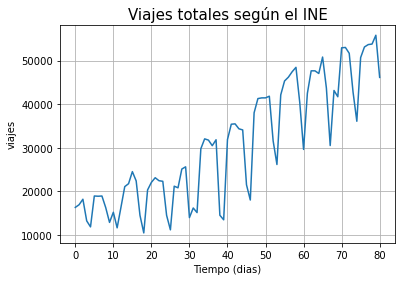

In [36]:
plt.plot(df_ine.values)
plt.grid(True)
plt.title("Viajes totales según el INE", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.show()

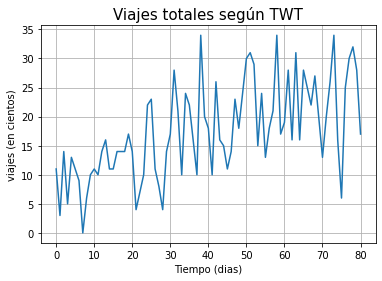

In [37]:
plt.plot(df_twt.values)
plt.grid(True)
plt.title("Viajes totales según TWT", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en cientos)", fontsize = 10)
plt.show()

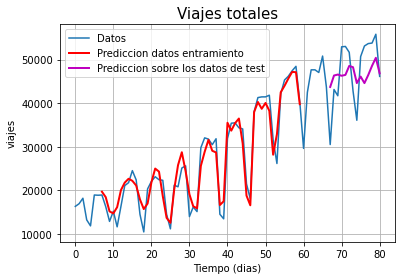

In [38]:
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset_ine)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset_ine)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset_ine), :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_ine))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Viajes totales", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.show()

In [39]:
results=testPredict
print(len(results))

14


In [40]:
test = testY_scalerInverse[0]

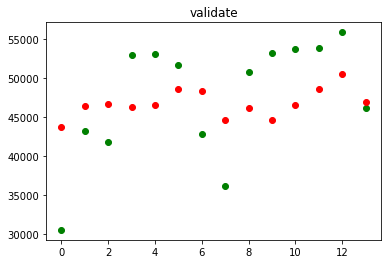

In [41]:
plt.scatter(range(len(test)),test,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

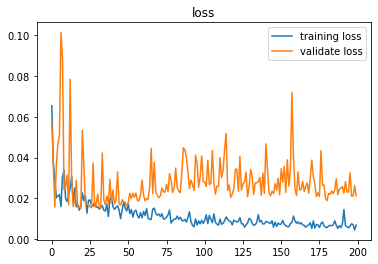

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend( ('training loss', 'validate loss'), loc = 'upper right')
plt.show()

In [43]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

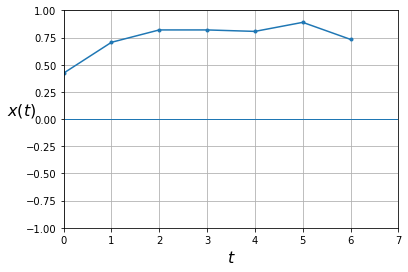

In [44]:
n_steps = 6
plot_series(testX[0, :, 0], testY_scalerInverse[0, 0], testPredict[0, 0])
plt.show()

# Exportar los datos

In [45]:
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-06-07', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(testPredict, index= index_days)
prediccion.columns = ['valor predicho']

prediccion

,valor predicho
2020-06-07,43720.269531
2020-06-08,46343.679688
2020-06-09,46568.562500
2020-06-10,46292.050781
2020-06-11,46486.722656
2020-06-12,48547.089844
2020-06-13,48255.343750
2020-06-14,44608.761719
2020-06-15,46102.148438
2020-06-16,44602.976562


In [46]:
datosReales = df_ine['2020-6-07':'2020-6-20']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']

compara

,real,prediccion
2020-06-07,30490,43720.269531
2020-06-08,43136,46343.679688
2020-06-09,41698,46568.562500
2020-06-10,52941,46292.050781
2020-06-11,53023,46486.722656
2020-06-12,51677,48547.089844
2020-06-13,42811,48255.343750
2020-06-14,36064,44608.761719
2020-06-15,50699,46102.148438
2020-06-16,53129,44602.976562


In [47]:
compara.to_excel('Resultados INE - TWT.xlsx', columns=['real', 'prediccion'])

# Prediccion a futuro

In [48]:
# usaremos 7 dias que poseemos para predecir los 7 dias siguientes tras esto compararemos los resultados con los que
# poseemos para ver el grado de error

Dias_twt = df_twt['2020-5-25':'2020-5-31']
Dias_ine = df_ine['2020-5-25':'2020-5-31']

In [49]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos, en este caso modificada para ayudarnos a crear
#los distintos sets de entrenmiento para distintos modelos que predeciran 1 dia cada uno

def create_dataset2(dataset1, dataset2, look_back=1, dias=0):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back-dias):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back + dias, 0])
  return np.array(dataX), np.array(dataY)

In [50]:
#ahora crearemos los sets para entrenar los modelos
look_back = 7

trainX1, trainY1 = create_dataset2(train_twt, train_ine, look_back, 1)
testX1, testY1 = create_dataset2(test_twt, test_ine, look_back, 1)

trainX2, trainY2 = create_dataset2(train_twt, train_ine, look_back, 2)
testX2, testY2 = create_dataset2(test_twt, test_ine, look_back, 2)

trainX3, trainY3 = create_dataset2(train_twt, train_ine, look_back, 3)
testX3, testY3 = create_dataset2(test_twt, test_ine, look_back, 3)

trainX4, trainY4 = create_dataset2(train_twt, train_ine, look_back, 4)
testX4, testY4 = create_dataset2(test_twt, test_ine, look_back, 4)

trainX5, trainY5 = create_dataset2(train_twt, train_ine, look_back, 5)
testX5, testY5 = create_dataset2(test_twt, test_ine, look_back, 5)

trainX6, trainY6 = create_dataset2(train_twt, train_ine, look_back, 6)
testX6, testY6 = create_dataset2(test_twt, test_ine, look_back, 6)

In [51]:
print(trainX1)

[[[[0.12908483 0.32352942]]

  [[0.14267153 0.0882353 ]]

  [[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]]


 [[[0.14267153 0.0882353 ]]

  [[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]]


 [[[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]]


 [[[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]

  [[0.05317977 0.29411766]]]


 [[[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]

  [[0.05317977 0.29411766]]

  [[0.

In [52]:
print(trainY1)

[0.12793976 0.05317977 0.10444376 0.02567604 0.1293931  0.23418918
 0.24907511 0.31002817 0.26323438 0.08909538 0.         0.21734342
 0.25565928 0.27919933 0.2640932  0.2611204  0.08898529 0.01559059
 0.23639125 0.2282216  0.32315245 0.33438298 0.07749054 0.12613407
 0.10285828 0.42594466 0.47579935 0.46945742 0.44131508 0.47130713
 0.08935964 0.06632608 0.47229806 0.5499207  0.5517484  0.52682114
 0.5209416  0.24343786 0.16645381 0.6077689  0.67957807 0.68307936
 0.68316746 0.6916013  0.46597818 0.34607592 0.69827354 0.76862943
 0.78765523 0.8153131  0.83762    0.6593411 ]


In [53]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]

trainX1 = np.reshape(trainX1, (trainX1.shape[0], trainX1.shape[1], 2))
testX1 = np.reshape(testX1, (testX1.shape[0], testX1.shape[1], 2))

trainX2 = np.reshape(trainX2, (trainX2.shape[0], trainX2.shape[1], 2))
testX2 = np.reshape(testX2, (testX2.shape[0], testX2.shape[1], 2))

trainX3 = np.reshape(trainX3, (trainX3.shape[0], trainX3.shape[1], 2))
testX3 = np.reshape(testX3, (testX3.shape[0], testX3.shape[1], 2))

trainX4 = np.reshape(trainX4, (trainX4.shape[0], trainX4.shape[1], 2))
testX4 = np.reshape(testX4, (testX4.shape[0], testX4.shape[1], 2))

trainX5 = np.reshape(trainX5, (trainX5.shape[0], trainX5.shape[1], 2))
testX5 = np.reshape(testX5, (testX5.shape[0], testX5.shape[1], 2))

trainX6 = np.reshape(trainX6, (trainX6.shape[0], trainX6.shape[1], 2))
testX6 = np.reshape(testX6, (testX6.shape[0], testX6.shape[1], 2))

In [54]:
#creamos los distintos modelos para predecir cada dia

model1 = crear_modeloFF()
history=model1.fit(trainX1, trainY1, epochs=200, validation_data=(testX1,testY1), batch_size=1, verbose=2)

model2 = crear_modeloFF()
history=model2.fit(trainX2, trainY2, epochs=200, validation_data=(testX2,testY2), batch_size=1, verbose=2)

model3 = crear_modeloFF()
history=model3.fit(trainX3, trainY3, epochs=200, validation_data=(testX3,testY3), batch_size=1, verbose=2)

model4 = crear_modeloFF()
history=model4.fit(trainX4, trainY4, epochs=200, validation_data=(testX4,testY4), batch_size=1, verbose=2)

model5 = crear_modeloFF()
history=model5.fit(trainX5, trainY5, epochs=200, validation_data=(testX5,testY5), batch_size=1, verbose=2)

model6 = crear_modeloFF()
history=model6.fit(trainX6, trainY6, epochs=200, validation_data=(testX6,testY6), batch_size=1, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 20)             1840      
_________________________________________________________________
lstm_4 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
__________________________________________________

52/52 - 0s - loss: 0.0088 - val_loss: 0.0185
Epoch 123/200
52/52 - 0s - loss: 0.0081 - val_loss: 0.0209
Epoch 124/200
52/52 - 0s - loss: 0.0085 - val_loss: 0.0252
Epoch 125/200
52/52 - 0s - loss: 0.0089 - val_loss: 0.0145
Epoch 126/200
52/52 - 0s - loss: 0.0083 - val_loss: 0.0184
Epoch 127/200
52/52 - 0s - loss: 0.0081 - val_loss: 0.0231
Epoch 128/200
52/52 - 0s - loss: 0.0096 - val_loss: 0.0168
Epoch 129/200
52/52 - 0s - loss: 0.0101 - val_loss: 0.0139
Epoch 130/200
52/52 - 0s - loss: 0.0073 - val_loss: 0.0167
Epoch 131/200
52/52 - 0s - loss: 0.0084 - val_loss: 0.0154
Epoch 132/200
52/52 - 0s - loss: 0.0084 - val_loss: 0.0269
Epoch 133/200
52/52 - 0s - loss: 0.0084 - val_loss: 0.0222
Epoch 134/200
52/52 - 0s - loss: 0.0081 - val_loss: 0.0391
Epoch 135/200
52/52 - 0s - loss: 0.0089 - val_loss: 0.0437
Epoch 136/200
52/52 - 0s - loss: 0.0068 - val_loss: 0.0270
Epoch 137/200
52/52 - 0s - loss: 0.0076 - val_loss: 0.0208
Epoch 138/200
52/52 - 0s - loss: 0.0080 - val_loss: 0.0169
Epoch 139/2

Epoch 43/200
51/51 - 0s - loss: 0.0133 - val_loss: 0.0141
Epoch 44/200
51/51 - 0s - loss: 0.0122 - val_loss: 0.0279
Epoch 45/200
51/51 - 0s - loss: 0.0128 - val_loss: 0.0155
Epoch 46/200
51/51 - 0s - loss: 0.0164 - val_loss: 0.0114
Epoch 47/200
51/51 - 0s - loss: 0.0119 - val_loss: 0.0145
Epoch 48/200
51/51 - 0s - loss: 0.0100 - val_loss: 0.0140
Epoch 49/200
51/51 - 0s - loss: 0.0117 - val_loss: 0.0135
Epoch 50/200
51/51 - 0s - loss: 0.0126 - val_loss: 0.0180
Epoch 51/200
51/51 - 0s - loss: 0.0111 - val_loss: 0.0476
Epoch 52/200
51/51 - 0s - loss: 0.0126 - val_loss: 0.0244
Epoch 53/200
51/51 - 0s - loss: 0.0120 - val_loss: 0.0105
Epoch 54/200
51/51 - 0s - loss: 0.0119 - val_loss: 0.0100
Epoch 55/200
51/51 - 0s - loss: 0.0141 - val_loss: 0.0118
Epoch 56/200
51/51 - 0s - loss: 0.0116 - val_loss: 0.0110
Epoch 57/200
51/51 - 0s - loss: 0.0115 - val_loss: 0.0109
Epoch 58/200
51/51 - 0s - loss: 0.0119 - val_loss: 0.0131
Epoch 59/200
51/51 - 0s - loss: 0.0108 - val_loss: 0.0167
Epoch 60/200
5

Epoch 183/200
51/51 - 0s - loss: 0.0074 - val_loss: 0.0250
Epoch 184/200
51/51 - 0s - loss: 0.0075 - val_loss: 0.0232
Epoch 185/200
51/51 - 0s - loss: 0.0081 - val_loss: 0.0219
Epoch 186/200
51/51 - 0s - loss: 0.0077 - val_loss: 0.0252
Epoch 187/200
51/51 - 0s - loss: 0.0094 - val_loss: 0.0214
Epoch 188/200
51/51 - 0s - loss: 0.0079 - val_loss: 0.0222
Epoch 189/200
51/51 - 0s - loss: 0.0059 - val_loss: 0.0234
Epoch 190/200
51/51 - 0s - loss: 0.0086 - val_loss: 0.0221
Epoch 191/200
51/51 - 0s - loss: 0.0093 - val_loss: 0.0237
Epoch 192/200
51/51 - 0s - loss: 0.0084 - val_loss: 0.0251
Epoch 193/200
51/51 - 0s - loss: 0.0063 - val_loss: 0.0322
Epoch 194/200
51/51 - 0s - loss: 0.0086 - val_loss: 0.0226
Epoch 195/200
51/51 - 0s - loss: 0.0096 - val_loss: 0.0348
Epoch 196/200
51/51 - 0s - loss: 0.0070 - val_loss: 0.0266
Epoch 197/200
51/51 - 0s - loss: 0.0090 - val_loss: 0.0301
Epoch 198/200
51/51 - 0s - loss: 0.0073 - val_loss: 0.0199
Epoch 199/200
51/51 - 0s - loss: 0.0067 - val_loss: 0.01

50/50 - 0s - loss: 0.0103 - val_loss: 0.0095
Epoch 105/200
50/50 - 0s - loss: 0.0098 - val_loss: 0.0175
Epoch 106/200
50/50 - 0s - loss: 0.0099 - val_loss: 0.0256
Epoch 107/200
50/50 - 0s - loss: 0.0102 - val_loss: 0.0329
Epoch 108/200
50/50 - 0s - loss: 0.0128 - val_loss: 0.0161
Epoch 109/200
50/50 - 0s - loss: 0.0116 - val_loss: 0.0123
Epoch 110/200
50/50 - 0s - loss: 0.0106 - val_loss: 0.0132
Epoch 111/200
50/50 - 0s - loss: 0.0128 - val_loss: 0.0132
Epoch 112/200
50/50 - 0s - loss: 0.0098 - val_loss: 0.0299
Epoch 113/200
50/50 - 0s - loss: 0.0094 - val_loss: 0.0172
Epoch 114/200
50/50 - 0s - loss: 0.0099 - val_loss: 0.0108
Epoch 115/200
50/50 - 0s - loss: 0.0096 - val_loss: 0.0111
Epoch 116/200
50/50 - 0s - loss: 0.0090 - val_loss: 0.0127
Epoch 117/200
50/50 - 0s - loss: 0.0079 - val_loss: 0.0227
Epoch 118/200
50/50 - 0s - loss: 0.0097 - val_loss: 0.0178
Epoch 119/200
50/50 - 0s - loss: 0.0096 - val_loss: 0.0154
Epoch 120/200
50/50 - 0s - loss: 0.0107 - val_loss: 0.0148
Epoch 121/2

49/49 - 0s - loss: 0.0151 - val_loss: 0.0253
Epoch 25/200
49/49 - 0s - loss: 0.0173 - val_loss: 0.0368
Epoch 26/200
49/49 - 0s - loss: 0.0162 - val_loss: 0.0148
Epoch 27/200
49/49 - 0s - loss: 0.0165 - val_loss: 0.0717
Epoch 28/200
49/49 - 0s - loss: 0.0160 - val_loss: 0.1169
Epoch 29/200
49/49 - 0s - loss: 0.0167 - val_loss: 0.0513
Epoch 30/200
49/49 - 0s - loss: 0.0132 - val_loss: 0.0188
Epoch 31/200
49/49 - 0s - loss: 0.0148 - val_loss: 0.0773
Epoch 32/200
49/49 - 0s - loss: 0.0153 - val_loss: 0.0388
Epoch 33/200
49/49 - 0s - loss: 0.0227 - val_loss: 0.0246
Epoch 34/200
49/49 - 0s - loss: 0.0189 - val_loss: 0.0385
Epoch 35/200
49/49 - 0s - loss: 0.0146 - val_loss: 0.0375
Epoch 36/200
49/49 - 0s - loss: 0.0122 - val_loss: 0.0284
Epoch 37/200
49/49 - 0s - loss: 0.0144 - val_loss: 0.0324
Epoch 38/200
49/49 - 0s - loss: 0.0147 - val_loss: 0.0362
Epoch 39/200
49/49 - 0s - loss: 0.0131 - val_loss: 0.0897
Epoch 40/200
49/49 - 0s - loss: 0.0142 - val_loss: 0.3250
Epoch 41/200
49/49 - 0s - l

Epoch 165/200
49/49 - 0s - loss: 0.0085 - val_loss: 0.0204
Epoch 166/200
49/49 - 0s - loss: 0.0104 - val_loss: 0.0099
Epoch 167/200
49/49 - 0s - loss: 0.0094 - val_loss: 0.0096
Epoch 168/200
49/49 - 0s - loss: 0.0085 - val_loss: 0.0108
Epoch 169/200
49/49 - 0s - loss: 0.0080 - val_loss: 0.0143
Epoch 170/200
49/49 - 0s - loss: 0.0089 - val_loss: 0.0182
Epoch 171/200
49/49 - 0s - loss: 0.0086 - val_loss: 0.0092
Epoch 172/200
49/49 - 0s - loss: 0.0079 - val_loss: 0.0123
Epoch 173/200
49/49 - 0s - loss: 0.0084 - val_loss: 0.0127
Epoch 174/200
49/49 - 0s - loss: 0.0101 - val_loss: 0.0167
Epoch 175/200
49/49 - 0s - loss: 0.0083 - val_loss: 0.0103
Epoch 176/200
49/49 - 0s - loss: 0.0076 - val_loss: 0.0295
Epoch 177/200
49/49 - 0s - loss: 0.0070 - val_loss: 0.0129
Epoch 178/200
49/49 - 0s - loss: 0.0075 - val_loss: 0.0081
Epoch 179/200
49/49 - 0s - loss: 0.0082 - val_loss: 0.0110
Epoch 180/200
49/49 - 0s - loss: 0.0068 - val_loss: 0.0139
Epoch 181/200
49/49 - 0s - loss: 0.0075 - val_loss: 0.01

Epoch 86/200
48/48 - 0s - loss: 0.0103 - val_loss: 0.0271
Epoch 87/200
48/48 - 0s - loss: 0.0100 - val_loss: 0.0219
Epoch 88/200
48/48 - 0s - loss: 0.0094 - val_loss: 0.0269
Epoch 89/200
48/48 - 0s - loss: 0.0083 - val_loss: 0.0485
Epoch 90/200
48/48 - 0s - loss: 0.0111 - val_loss: 0.0105
Epoch 91/200
48/48 - 0s - loss: 0.0107 - val_loss: 0.0450
Epoch 92/200
48/48 - 0s - loss: 0.0113 - val_loss: 0.0257
Epoch 93/200
48/48 - 0s - loss: 0.0097 - val_loss: 0.0079
Epoch 94/200
48/48 - 0s - loss: 0.0091 - val_loss: 0.0123
Epoch 95/200
48/48 - 0s - loss: 0.0095 - val_loss: 0.0200
Epoch 96/200
48/48 - 0s - loss: 0.0098 - val_loss: 0.0153
Epoch 97/200
48/48 - 0s - loss: 0.0090 - val_loss: 0.0313
Epoch 98/200
48/48 - 0s - loss: 0.0088 - val_loss: 0.0126
Epoch 99/200
48/48 - 0s - loss: 0.0098 - val_loss: 0.0261
Epoch 100/200
48/48 - 0s - loss: 0.0093 - val_loss: 0.0328
Epoch 101/200
48/48 - 0s - loss: 0.0090 - val_loss: 0.0223
Epoch 102/200
48/48 - 0s - loss: 0.0090 - val_loss: 0.0143
Epoch 103/2

Epoch 6/200
47/47 - 0s - loss: 0.0411 - val_loss: 0.0362
Epoch 7/200
47/47 - 0s - loss: 0.0358 - val_loss: 0.0219
Epoch 8/200
47/47 - 0s - loss: 0.0324 - val_loss: 0.0226
Epoch 9/200
47/47 - 0s - loss: 0.0324 - val_loss: 0.0252
Epoch 10/200
47/47 - 0s - loss: 0.0369 - val_loss: 0.0883
Epoch 11/200
47/47 - 0s - loss: 0.0321 - val_loss: 0.0219
Epoch 12/200
47/47 - 0s - loss: 0.0366 - val_loss: 0.0271
Epoch 13/200
47/47 - 0s - loss: 0.0317 - val_loss: 0.0229
Epoch 14/200
47/47 - 0s - loss: 0.0359 - val_loss: 0.0287
Epoch 15/200
47/47 - 0s - loss: 0.0362 - val_loss: 0.0239
Epoch 16/200
47/47 - 0s - loss: 0.0375 - val_loss: 0.0245
Epoch 17/200
47/47 - 0s - loss: 0.0269 - val_loss: 0.0261
Epoch 18/200
47/47 - 0s - loss: 0.0303 - val_loss: 0.0265
Epoch 19/200
47/47 - 0s - loss: 0.0304 - val_loss: 0.0375
Epoch 20/200
47/47 - 0s - loss: 0.0314 - val_loss: 0.0570
Epoch 21/200
47/47 - 0s - loss: 0.0463 - val_loss: 0.0278
Epoch 22/200
47/47 - 0s - loss: 0.0342 - val_loss: 0.0399
Epoch 23/200
47/47

Epoch 147/200
47/47 - 0s - loss: 0.0067 - val_loss: 0.1187
Epoch 148/200
47/47 - 0s - loss: 0.0065 - val_loss: 0.0456
Epoch 149/200
47/47 - 0s - loss: 0.0078 - val_loss: 0.0069
Epoch 150/200
47/47 - 0s - loss: 0.0086 - val_loss: 0.0616
Epoch 151/200
47/47 - 0s - loss: 0.0055 - val_loss: 0.0276
Epoch 152/200
47/47 - 0s - loss: 0.0079 - val_loss: 0.0179
Epoch 153/200
47/47 - 0s - loss: 0.0053 - val_loss: 0.0271
Epoch 154/200
47/47 - 0s - loss: 0.0063 - val_loss: 0.0554
Epoch 155/200
47/47 - 0s - loss: 0.0053 - val_loss: 0.0096
Epoch 156/200
47/47 - 0s - loss: 0.0089 - val_loss: 0.0109
Epoch 157/200
47/47 - 0s - loss: 0.0062 - val_loss: 0.0173
Epoch 158/200
47/47 - 0s - loss: 0.0066 - val_loss: 0.0672
Epoch 159/200
47/47 - 0s - loss: 0.0072 - val_loss: 0.0933
Epoch 160/200
47/47 - 0s - loss: 0.0050 - val_loss: 0.0796
Epoch 161/200
47/47 - 0s - loss: 0.0062 - val_loss: 0.0614
Epoch 162/200
47/47 - 0s - loss: 0.0060 - val_loss: 0.0152
Epoch 163/200
47/47 - 0s - loss: 0.0059 - val_loss: 0.03

# Preparamos los datos para el test

In [55]:
# cargamos el dataframe en la variable dataset
dataset_twt = Dias_twt.values
dataset_ine = Dias_ine.values

# convertimos los enteros en floats
dataset_twt = dataset_twt.astype('float32')
dataset_ine = dataset_ine.astype('float32')

# normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

In [56]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset3(dataset1, dataset2):
  dataX = []
  for x in range(len(dataset2)):
    dataX.append(dataset2[x])  
    dataX.append(dataset1[x])
  dataX = np.array(dataX)
  dataX = np.reshape(dataX, (7, 1, 2))
  return np.array(dataX)

In [57]:
# usamos la funcion definida previamente para crear el dataset
testX = create_dataset3(dataset_twt, dataset_ine)

In [58]:
#remodelamos los datos
testX = np.reshape(testX, (1, 7, 2))

# Realizamos la prediccion 

In [59]:
results = []

parcial=model.predict(testX)
results.append(parcial[0])

parcial=model1.predict(testX)
results.append(parcial[0])

parcial=model2.predict(testX)
results.append(parcial[0])

parcial=model3.predict(testX)
results.append(parcial[0])

parcial=model4.predict(testX)
results.append(parcial[0])

parcial=model5.predict(testX)
results.append(parcial[0])

parcial=model6.predict(testX)
results.append(parcial[0])

results = np.reshape(results, (7, 1))
print(results)

[[0.6899816 ]
 [0.9069582 ]
 [0.8535043 ]
 [0.8854369 ]
 [1.0014383 ]
 [0.90439403]
 [0.5687675 ]]


# Re-Convertimos los resultados

In [60]:
inverted = scaler.inverse_transform(results)

#en nuestro problema no tienen sentido los decimales pues no se pueden hacer 0.5 viajes o 0.25 viajes
inverted = inverted.round()
inverted = inverted.astype(int)

inverted

array([[42609],
       [46700],
       [45692],
       [46294],
       [48481],
       [46651],
       [40323]])

# Visualizamos el pronostico

<AxesSubplot:>

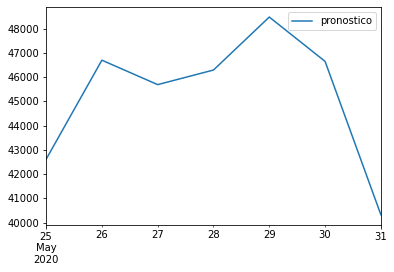

In [61]:
e_date = datetime.datetime.strptime('2020-05-31', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-05-25', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(inverted, index= index_days)
prediccion.columns = ['pronostico']
prediccion.plot()

In [62]:
datosReales = df_ine['2020-5-25':'2020-5-31']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']
compara

,real,prediccion
2020-05-25,42126,42609
2020-05-26,45321,46700
2020-05-27,46185,45692
2020-05-28,47441,46294
2020-05-29,48454,48481
2020-05-30,40358,46651
2020-05-31,29599,40323


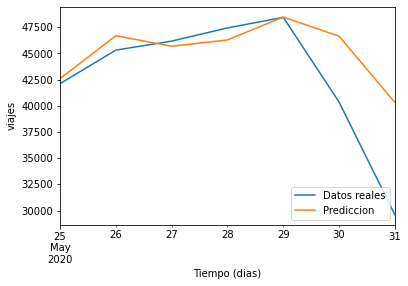

In [63]:
compara['real'].plot()
compara['prediccion'].plot()
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.legend( ('Datos reales', 'Prediccion'), loc = 'lower right')

In [64]:
# calculamos las metricas de error
testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion, datosReales)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del test: 2935.14 MAE
Resultado del test: 22614334.57 MSE
Resultado del test: 4755.45 RMSE
Resultado del test: 10.51 CVRMSE
Resultado del test: 6.83 MAPE


In [65]:
# calculamos las metricas de error para cada dia por separado
for i in range(7):
    testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion.values[i], datosReales.values[i])
    day = i + 1
    print('Resultado del test dia %d: %.2f MAE' % (day, testScore_MAE))
    print('Resultado del test dia %d: %.2f MSE' % (day, testScore_MSE))
    print('Resultado del test dia %d: %.2f RMSE' % (day, testScore_RMSE))
    print('Resultado del test dia %d: %.2f CVRMSE' % (day, testScore_CVRMSE))
    print('Resultado del test dia %d: %.2f MAPE \n' % (day, testScore_MAPE))

Resultado del test dia 1: 483.00 MAE
Resultado del test dia 1: 233289.00 MSE
Resultado del test dia 1: 483.00 RMSE
Resultado del test dia 1: 1.13 CVRMSE
Resultado del test dia 1: 1.13 MAPE 

Resultado del test dia 2: 1379.00 MAE
Resultado del test dia 2: 1901641.00 MSE
Resultado del test dia 2: 1379.00 RMSE
Resultado del test dia 2: 2.95 CVRMSE
Resultado del test dia 2: 2.95 MAPE 

Resultado del test dia 3: 493.00 MAE
Resultado del test dia 3: 243049.00 MSE
Resultado del test dia 3: 493.00 RMSE
Resultado del test dia 3: 1.08 CVRMSE
Resultado del test dia 3: 1.08 MAPE 

Resultado del test dia 4: 1147.00 MAE
Resultado del test dia 4: 1315609.00 MSE
Resultado del test dia 4: 1147.00 RMSE
Resultado del test dia 4: 2.48 CVRMSE
Resultado del test dia 4: 2.48 MAPE 

Resultado del test dia 5: 27.00 MAE
Resultado del test dia 5: 729.00 MSE
Resultado del test dia 5: 27.00 RMSE
Resultado del test dia 5: 0.06 CVRMSE
Resultado del test dia 5: 0.06 MAPE 

Resultado del test dia 6: 6293.00 MAE
Result